# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania z wielu miejsc początkowych 1 pkt


In [95]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(\textbf{x}) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

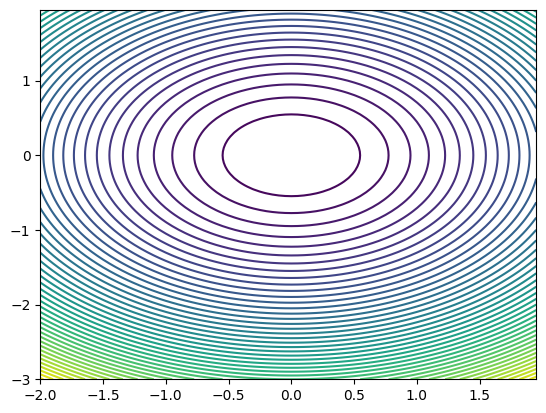

In [96]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

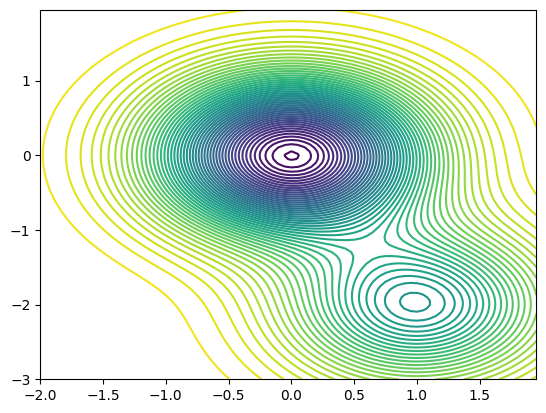

In [97]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [98]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if self.trace is not None:
            if len(self.trace)>0:
                plt.plot(self.trace[:,0], self.trace[:,1], color="red")

    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        return np.array(x1, x2) - self.alpha * np.array(self.calculate_func_grad(x1, x2))

    def minimize(self, x1_init: float, x2_init: float, steps: int,
             verbose: int = 0, plot: bool = False) -> float:
        self.trace = np.array([[x1_init, x2_init], ])
    
        for i in range(1, steps):
            result = self.gradient_descent_step(self.trace[i - 1, 0],
                                                self.trace[i - 1, 1])
            self.trace = np.append(self.trace, np.array([result]), axis=0)
    
        if plot:
            self.plot_func()
    
        return self.calculate_func_vale(self.trace[-1, 0], self.trace[-1, 1])

# Funkcja 1
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

# Funkcja 2
### Funkcja
\begin{equation}
g(\textbf{x}) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}
### Gradient
\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [99]:
X = np.arange(-2, 2, 0.05)

In [100]:
class FunctionF:
    def __call__(self, X1: np.array, X2: np.array) -> np.array:
        return X1**2 + X2**2
    
    
class GradF:
    def __call__(self, X1: np.array, X2: np.array) -> Tuple[np.array, np.array]:
        grad = (2*X1, 2*X2)
        return grad
    
class FunctionG:
    def __call__(self, X1: np.array, X2: np.array) -> np.array:
        return 1.5 - np.exp(-X1**2-X2**2) - 0.5*np.exp(-(X1-1)**2-(X2+2)**2)
    
class GradG:
    def __call__(self, X1: np.array, X2: np.array) -> Tuple[np.array, np.array]:
        grad = (2*X1*np.exp(-X1**2-X2**2)+(X1-1)*np.exp(-(X1-1)**2-(X2+2)**2),
                2*X2*np.exp(-X1**2-X2**2)+(X2+2)*np.exp(-(X1-1)**2-(X2+2)**2))
        return grad

Actual: 0	Calculated: 1.4322909208601874e-09	Error:1.4322909208601874e-09


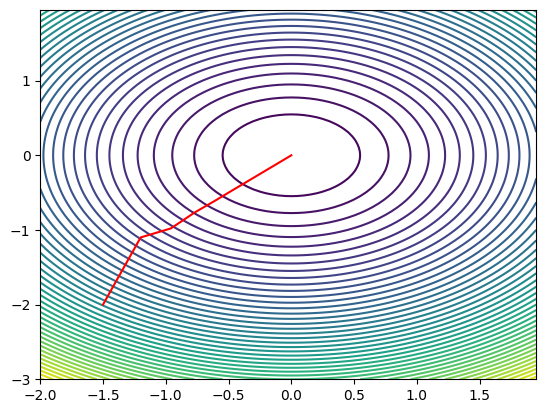

In [101]:
function1 = FunctionF()
grad1 = GradF()
gradient = SimpleGradientDescent(function1, grad1)
value = gradient.minimize(-1.5, -2, 50, 0, True)
print(f"Actual: {function1(0, 0)}\tCalculated: {value}\tError:{abs(function1(0, 0)-value)}")

Actual: 0.49663102650045726	Calculated: 0.4966549420463694	Error:2.3915545912134295e-05


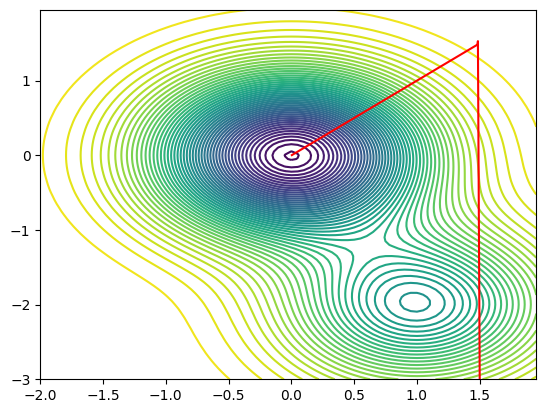

In [102]:
function2 = FunctionG()
grad2 = GradG()
gradient2 = SimpleGradientDescent(function2, grad2, alpha=0.1)
value = gradient2.minimize(1.5, -3, 100, 0, True)
print(f"Actual: {function2(0, 0)}\tCalculated: {value}\tError:{abs(function2(0, 0)-value)}")